# ANÁLISE DE SENTIMENTOS

![](https://miro.medium.com/proxy/1*_JW1JaMpK_fVGld8pd1_JQ.gif)

A análise de sentimento é o processo de detecção de sentimentos positivos ou negativos no texto. Muitas vezes, é usado por empresas para detectar sentimentos em dados sociais, avaliar a reputação da marca e entender os clientes.

Uma vez que os clientes expressam seus pensamentos e sentimentos de forma mais aberta do que nunca, a análise de sentimento está se tornando uma ferramenta essencial para monitorar e compreender esse sentimento. Analisar automaticamente o feedback do cliente, como opiniões em respostas a pesquisas e conversas de mídia social, permite que as marcas aprendam o que deixa os clientes felizes ou frustrados, para que possam personalizar produtos e serviços para atender às necessidades dos clientes.

Por exemplo, usar a análise de sentimento para analisar automaticamente mais de 50.000 comentários sobre seu produto pode ajudá-lo a descobrir se os clientes estão satisfeitos com seus planos de preços e atendimento ao cliente.

Talvez você queira avaliar o sentimento da marca nas redes sociais, em tempo real e ao longo do tempo, para que possa detectar clientes insatisfeitos imediatamente e responder o mais rápido possível.

**POR QUE A ANÁLISE DE SENTIMENTO É IMPORTANTE?** <br>
A análise de sentimento é extremamente importante porque ajuda as empresas a compreender rapidamente as opiniões gerais de seus clientes. Classificando automaticamente o sentimento por trás de comentários, conversas de mídia social e muito mais, você pode tomar decisões mais rápidas e precisas.

Estima-se que 90% dos dados do mundo não estão estruturados, ou seja, são desorganizados. Grandes volumes de dados de negócios não estruturados são criados todos os dias: e-mails, tíquetes de suporte, chats, conversas em mídias sociais, pesquisas, artigos, documentos, etc.). Mas é difícil analisar o sentimento de maneira oportuna e eficiente.<br>

**OS BENEFÍCIOS GERAIS DA ANÁLISE DE SENTIMENTO INCLUEM:** <br>

* **Classificação de dados em escala**

>Você consegue se imaginar classificando manualmente milhares de tweets, conversas de suporte ao cliente ou pesquisas? Existem muitos dados de negócios para processar manualmente. A análise de sentimento ajuda as empresas a processar grandes quantidades de dados de maneira eficiente e econômica.

* **Análise em tempo real**

>A análise de sentimento pode identificar problemas críticos em tempo real, por exemplo, uma crise de relações públicas nas redes sociais está aumentando? Um cliente irritado está prestes a se desligar? Os modelos de análise de sentimento podem ajudá-lo a identificar imediatamente esses tipos de situações, para que você possa agir imediatamente.

* **Critérios consistentes**

>Estima-se que as pessoas concordam apenas cerca de 60-65% das vezes ao determinar o sentimento de um determinado texto. Marcar texto por sentimento é altamente subjetivo, influenciado por experiências pessoais, pensamentos e crenças. Ao usar um sistema de análise de sentimento centralizado, as empresas podem aplicar os mesmos critérios a todos os seus dados, ajudando-as a melhorar a precisão e obter melhores percepções.

## Ambiente de desenvolvimento

In [1]:
#Instalar bibliotecas necessárias 
! pip install Unidecode
! pip install nltk
! pip install wordcloud
#Baixar pacotes necessários
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
#Basicas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Tramento de txsto
import re
import unidecode
from string import punctuation
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize
from nltk import ngrams

#Bibliotecas de visualização
import seaborn as sns
from matplotlib import pyplot as plt

#Paleta de cores
paleta_categorica = ["#9d9d9d","#ec008b","#00BFFF","#fdbf11",'#db2b27','#55b748',"#ec008b","#000000","#d2d2d2"]

#Desativar avisos
import warnings
warnings.filterwarnings("ignore")

# 8.*CORPUS*
Em linguística, um corpus (corpora no plural) é um recurso linguístico que consiste em um grande e estruturado conjunto de textos. Na linguística de corpus, eles são usados para fazer análises estatísticas e testes de hipóteses, verificando ocorrências ou validando regras linguísticas dentro de um território linguístico específico.

## Corpus da Olist Store
Vamos anlisar um banco de dados da Olist Store, disponível no repositório [Keggale](https://www.kaggle.com/olistbr/brazilian-ecommerce) , que possui registros de 100 mil compras realizadas, entre 2016 a 2018, feitas no Brasil, através de plataformas digitais. Seus recursos permitem visualizar um pedido de várias dimensões: do status do pedido, preço, meio de pagamento e frete, atributos do produto e os comentários escritos pelos compradores. O conjunto de dados também possui recursos de geolocalização que relacionam os códigos postais brasileiros às coordenadas (latitude e longitude) dos consumidores e vendedores

In [3]:
df=pd.read_csv('Corpus.csv')
df.head()

,Comentário,Avaliação,Produto,Região,UF,Tempo de Comentário,Tempo de Resposta da Loja,Atraso na Entrega,Nota
0,1 mes de atraso na entrega !!! ultima compra q...,negativa,moveis_decoracao,Região Norte,RR,NaN,24.667060,NaN,1.0
1,Não recebi o produto comprado há mais de 20 dias,negativa,moveis_decoracao,Região Sudeste,RJ,0.338738,3.120405,2.932489,1.0
2,Não recebi o produto comprado há mais de 20 dias,negativa,moveis_decoracao,Região Sudeste,RJ,0.338738,3.120405,9.573819,1.0
3,"Boa noite, o produto não funciona, e agora com...",negativa,eletronicos,Região Sudeste,SP,0.159676,2.984931,5.882592,1.0
4,Não recomendo essa loja pois me vendeu uma moc...,negativa,papelaria,Região Sudeste,SP,NaN,3.797465,NaN,1.0


## 8.1. Agregar informações

In [4]:
#Contar n° de caracteres
df['N° Caracteres'] = df['Comentário'].str.len()
df.head()

,Comentário,Avaliação,Produto,Região,UF,Tempo de Comentário,Tempo de Resposta da Loja,Atraso na Entrega,Nota,N° Caracteres
0,1 mes de atraso na entrega !!! ultima compra q...,negativa,moveis_decoracao,Região Norte,RR,NaN,24.667060,NaN,1.0,51.0
1,Não recebi o produto comprado há mais de 20 dias,negativa,moveis_decoracao,Região Sudeste,RJ,0.338738,3.120405,2.932489,1.0,48.0
2,Não recebi o produto comprado há mais de 20 dias,negativa,moveis_decoracao,Região Sudeste,RJ,0.338738,3.120405,9.573819,1.0,48.0
3,"Boa noite, o produto não funciona, e agora com...",negativa,eletronicos,Região Sudeste,SP,0.159676,2.984931,5.882592,1.0,67.0
4,Não recomendo essa loja pois me vendeu uma moc...,negativa,papelaria,Região Sudeste,SP,NaN,3.797465,NaN,1.0,74.0


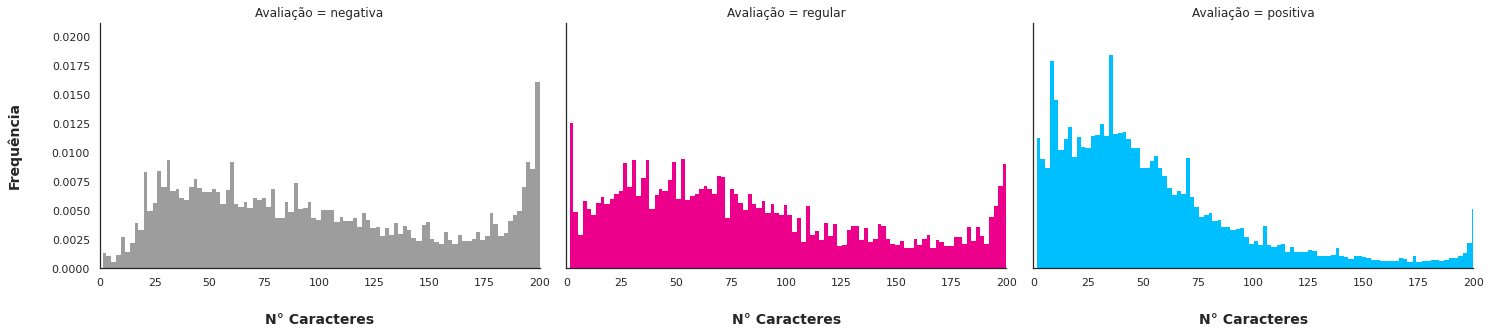

In [5]:
#Tamanho da Figura
sns.set(font_scale=1)
sns.set_style("white")
ax = sns.FacetGrid(data=df, col='Avaliação', hue='Avaliação', palette=paleta_categorica,height=4.5,aspect=1.5,xlim=(0,200),margin_titles=False,legend_out=False)
ax.map(plt.hist, 'N° Caracteres', bins=100,histtype='stepfilled',density=True)

#Rotulos ds eixos
ax.set_xlabels('N° Caracteres',fontsize=14,weight='bold',labelpad=25,rotation=0)
ax.set_ylabels('Frequência',fontsize=14,weight='bold',labelpad=30,rotation=90)

ax=ax


# 9.PROCESSAR O CORPUS

## 9.1. Remover *Stop Words*

In [6]:

#Tolkenizar (seprar palavras por espaço em branco)
token_epaco=tokenize.WhitespaceTokenizer()

#Palavras previmente lsitadas 
palavras_irrelevantes=nltk.corpus.stopwords.words("portuguese")

#Palavras julgadas como sem valor pra análise
palavras_extras=['pra','q','vc','n','tá','pq','tão','ainda','aqui','ir','tô','to',
                 'ta','mim','assim','O','coisa', 'E','É','pessoa','pessoas',
                 'ai','—','A','p','.',',','vai','vou','ter','tudo','gente','aí','se','dá',
                 'Se','Que','ser','Eu','eu','faz','mas','mas','sei','todo','pro','mas','Mas']


In [7]:
#Agrupar todas palvras irrelaventes em um lista só
palavras_irrelevantes.extend(palavras_extras)

#Elimnar stop words 
frase_processada=list()

for comentario in df['Comentário']:
    nova_frase=list()
    palavras_texto=token_epaco.tokenize(str(comentario))
    
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)        
    frase_processada.append(' '.join(nova_frase))

df['Stop Words']=frase_processada
df.head()

,Comentário,Avaliação,Produto,Região,UF,Tempo de Comentário,Tempo de Resposta da Loja,Atraso na Entrega,Nota,N° Caracteres,Stop Words
0,1 mes de atraso na entrega !!! ultima compra q...,negativa,moveis_decoracao,Região Norte,RR,NaN,24.667060,NaN,1.0,51.0,1 mes atraso entrega !!! ultima compra faço
1,Não recebi o produto comprado há mais de 20 dias,negativa,moveis_decoracao,Região Sudeste,RJ,0.338738,3.120405,2.932489,1.0,48.0,Não recebi produto comprado 20 dias
2,Não recebi o produto comprado há mais de 20 dias,negativa,moveis_decoracao,Região Sudeste,RJ,0.338738,3.120405,9.573819,1.0,48.0,Não recebi produto comprado 20 dias
3,"Boa noite, o produto não funciona, e agora com...",negativa,eletronicos,Região Sudeste,SP,0.159676,2.984931,5.882592,1.0,67.0,"Boa noite, produto funciona, agora resolvemos ..."
4,Não recomendo essa loja pois me vendeu uma moc...,negativa,papelaria,Região Sudeste,SP,NaN,3.797465,NaN,1.0,74.0,Não recomendo loja pois vendeu mochila estoque.


## 9.2. Normalização via regex

Em ciência da computação, uma expressão regular ou "Regex" (ou os estrangeirismos regex ou regexp, abreviação do inglês regular expression) provê uma forma concisa e flexível de identificar cadeias de caracteres de interesse, como caracteres particulares, palavras ou padrões de caracteres. Expressões regulares são escritas numa linguagem formal que pode ser interpretada por um processador de expressão regular, um programa que serve um gerador de analisador sintático ou examina o texto e identifica as partes que casam com a especificação dada

**FUNÇÃO - REMOVE  REGEX**

In [8]:
def remover(textos, regex):
    if type(textos) == str:
        return regex.sub(" ",textos)
    else:
        return [regex.sub(" ", texto) for texto in textos]

In [9]:
# REGEX's
links = re.compile(r"http\S+")
repete_letra_adpatado=re.compile(r'([a-q,r\3,t-w])\1+')
arrobas = re.compile('@[^\s]+')
especial=re.compile(r'[^\w]')

**FUNÇÃO - LETRAS MINUSCULAS**

In [10]:
def minusculo(textos):
    if type(textos) == str:
        return textos.lower()
    else:
        return [texto.lower() for texto in textos]

**FUNÇÃO ESPAÇOS DUPLOS**

In [11]:
regex_espaco = re.compile(r" +")
def substituir_por_espaco(textos, regex):
    if type(textos) == str:
        return regex.sub(" ", textos)
    else:
        return [regex.sub(" ", texto) for texto in textos]

**APLICAR NORMALIZAÇÃO**

In [12]:
# Remover links 
remove_links = remover(df['Stop Words'], links)
df["Regex"] = remove_links

# Remover arrobas
remove_arrobas=remover(df.Regex, arrobas)
df["Regex"] = remove_arrobas

#Colocar todos os textos em minúsculo
minusculas=minusculo(df.Regex)
df["Regex"] = minusculas

#Remover digitos 
regex_digitos = re.compile(r"\d+")
digitos=remover(df.Regex, regex_digitos)
df["Regex"] = digitos

#Remover espços duplos
espacos = substituir_por_espaco(df.Regex,regex_espaco)
df["Regex"] = espacos


#Retirar sinais 
remove_sinais=remover(df.Regex, especial)
df["Regex"] = remove_sinais

#Vizualizar
df.head()

,Comentário,Avaliação,Produto,Região,UF,Tempo de Comentário,Tempo de Resposta da Loja,Atraso na Entrega,Nota,N° Caracteres,Stop Words,Regex
0,1 mes de atraso na entrega !!! ultima compra q...,negativa,moveis_decoracao,Região Norte,RR,NaN,24.667060,NaN,1.0,51.0,1 mes atraso entrega !!! ultima compra faço,mes atraso entrega ultima compra faço
1,Não recebi o produto comprado há mais de 20 dias,negativa,moveis_decoracao,Região Sudeste,RJ,0.338738,3.120405,2.932489,1.0,48.0,Não recebi produto comprado 20 dias,não recebi produto comprado dias
2,Não recebi o produto comprado há mais de 20 dias,negativa,moveis_decoracao,Região Sudeste,RJ,0.338738,3.120405,9.573819,1.0,48.0,Não recebi produto comprado 20 dias,não recebi produto comprado dias
3,"Boa noite, o produto não funciona, e agora com...",negativa,eletronicos,Região Sudeste,SP,0.159676,2.984931,5.882592,1.0,67.0,"Boa noite, produto funciona, agora resolvemos ...",boa noite produto funciona agora resolvemos ...
4,Não recomendo essa loja pois me vendeu uma moc...,negativa,papelaria,Região Sudeste,SP,NaN,3.797465,NaN,1.0,74.0,Não recomendo loja pois vendeu mochila estoque.,não recomendo loja pois vendeu mochila estoque


## 9.3. Remover acentuação

In [13]:
#Remover acentos
sem_acentos=[unidecode.unidecode(texto) for texto in df['Regex']]
df['Acentuação']=sem_acentos
df.head()

,Comentário,Avaliação,Produto,Região,UF,Tempo de Comentário,Tempo de Resposta da Loja,Atraso na Entrega,Nota,N° Caracteres,Stop Words,Regex,Acentuação
0,1 mes de atraso na entrega !!! ultima compra q...,negativa,moveis_decoracao,Região Norte,RR,NaN,24.667060,NaN,1.0,51.0,1 mes atraso entrega !!! ultima compra faço,mes atraso entrega ultima compra faço,mes atraso entrega ultima compra faco
1,Não recebi o produto comprado há mais de 20 dias,negativa,moveis_decoracao,Região Sudeste,RJ,0.338738,3.120405,2.932489,1.0,48.0,Não recebi produto comprado 20 dias,não recebi produto comprado dias,nao recebi produto comprado dias
2,Não recebi o produto comprado há mais de 20 dias,negativa,moveis_decoracao,Região Sudeste,RJ,0.338738,3.120405,9.573819,1.0,48.0,Não recebi produto comprado 20 dias,não recebi produto comprado dias,nao recebi produto comprado dias
3,"Boa noite, o produto não funciona, e agora com...",negativa,eletronicos,Região Sudeste,SP,0.159676,2.984931,5.882592,1.0,67.0,"Boa noite, produto funciona, agora resolvemos ...",boa noite produto funciona agora resolvemos ...,boa noite produto funciona agora resolvemos ...
4,Não recomendo essa loja pois me vendeu uma moc...,negativa,papelaria,Região Sudeste,SP,NaN,3.797465,NaN,1.0,74.0,Não recomendo loja pois vendeu mochila estoque.,não recomendo loja pois vendeu mochila estoque,nao recomendo loja pois vendeu mochila estoque


# 10.NUVENS DE PALAVRAS

In [14]:
#Segregar tabela pelo critério avaliação
cm_neg=df[df['Avaliação']=='negativa']
cm_reg=df[df['Avaliação']=='regular']
cm_pos=df[df['Avaliação']=='positiva']

## 10.1. Avaliações negativas

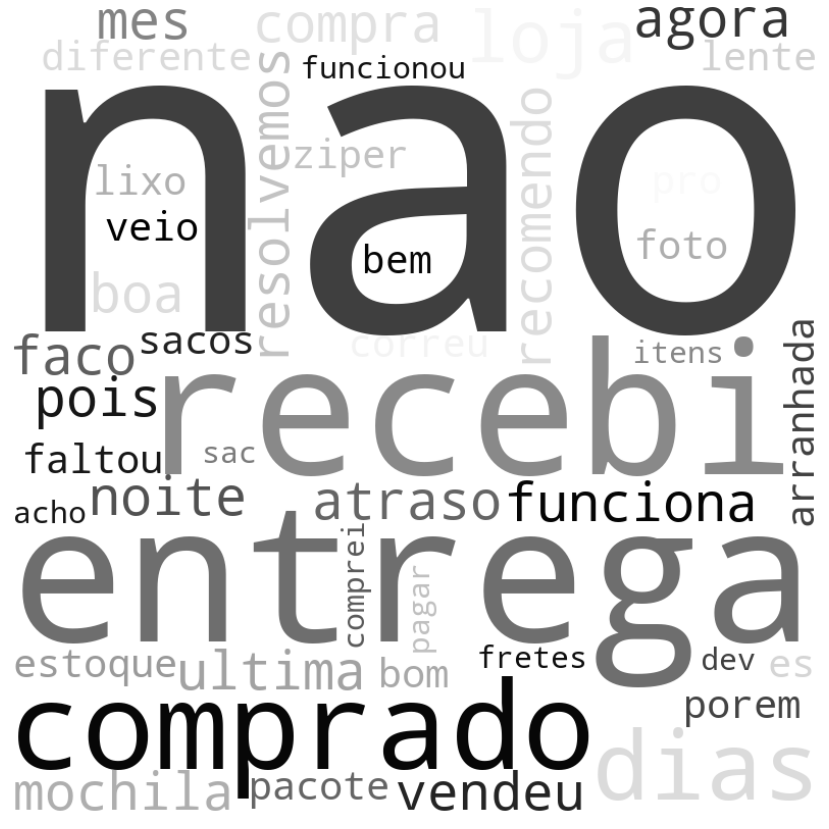

In [15]:
#Separar classe
cm_neg.reset_index(drop=True,inplace=True)

#Nuvem de palavras 
todas_palavras_neg=''.join([comentario for comentario in str(cm_neg['Acentuação'])])

nuvem_palavras=WordCloud(width=800, height=800,max_words=1000,colormap='Greys_r',background_color="white",
                         stopwords=['produto','Acentuação','dtype','object','Name','Length'],
                         max_font_size=500,min_font_size=1).generate(todas_palavras_neg) 
plt.figure(figsize=(15,15))                                           
plt.imshow(nuvem_palavras,interpolation='bilinear')                 
plt.axis("off")                                                       
plt.show()

## 10.2. Avaliações positivas

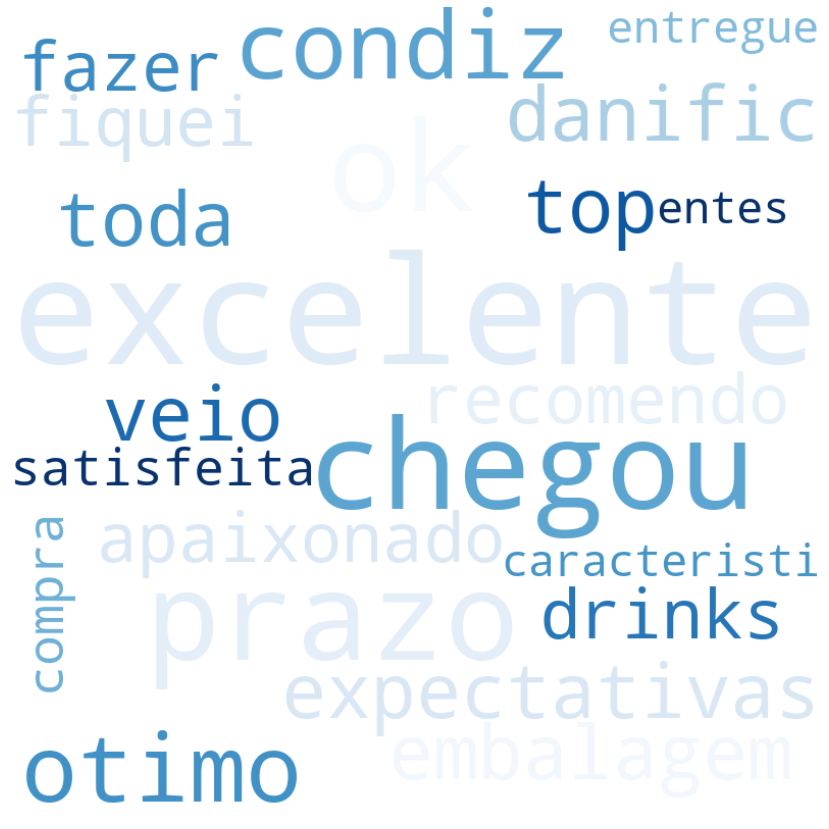

In [16]:
#Separar classe
cm_pos.reset_index(drop=True,inplace=True)

#Nuvem de palavras 
todas_palavras_pos=''.join([comentario for comentario in str(cm_pos['Acentuação'])])

nuvem_palavras=WordCloud(width=800, height=800,max_words=1000,colormap='Blues_r',background_color="white",
                         stopwords=['produto','Acentuação','dtype','object','Name','Length'],
                         max_font_size=500,min_font_size=1).generate(todas_palavras_pos) 
plt.figure(figsize=(15,15))                                           
plt.imshow(nuvem_palavras,interpolation='bilinear')                 
plt.axis("off")                                                       
plt.show()

# 11.N-GRAMAS
Nos campos da linguística computacional e probabilidade, um n-grama é uma sequência contígua de n itens de uma dada amostra de texto ou fala. Os itens podem ser fonemas, sílabas, letras, palavras ou pares de bases de acordo com a aplicação. Os n-gramas normalmente são coletados de um corpus de texto ou fala. 

Usando prefixos numéricos latinos, um n-grama de tamanho 1 é referido como um "unigrama"; o tamanho 2 é um "bigrama" (ou, menos comumente, um "digrama"); o tamanho 3 é um "trigrama", por exemplo.

In [19]:
# FUNÇÃO DE EXTRAÇÃO
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=palavras_irrelevantes):    
    # Usando CountVectorizer para construir um pacote de palavras usando o corpus dado
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    
    # Retornando um DataFrame com a contagem de n-gramas
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    return count_df

In [23]:
# EXTRAIR N-GRAMAS MAIS FRQUENTES
negative_comments = df.query('Avaliação == "negativa"')['Acentuação']
regular_comments = df.query('Avaliação == "regular"'  )['Acentuação']
positive_comments = df.query('Avaliação == "positiva"')['Acentuação']

#Exrair bigramas mais frequntes 
bigrams_neg = ngrams_count(negative_comments, (2, 2), 10)
bigrams_reg = ngrams_count(regular_comments , (2, 2), 10)
bigrams_pos = ngrams_count(positive_comments, (2, 2), 10)

# Exrair triigramas mais frequntes 
trigrams_neg = ngrams_count(negative_comments, (3, 3), 10)
trigrams_reg = ngrams_count(regular_comments, (3, 3), 10)
trigrams_pos = ngrams_count(positive_comments, (3, 3), 10)

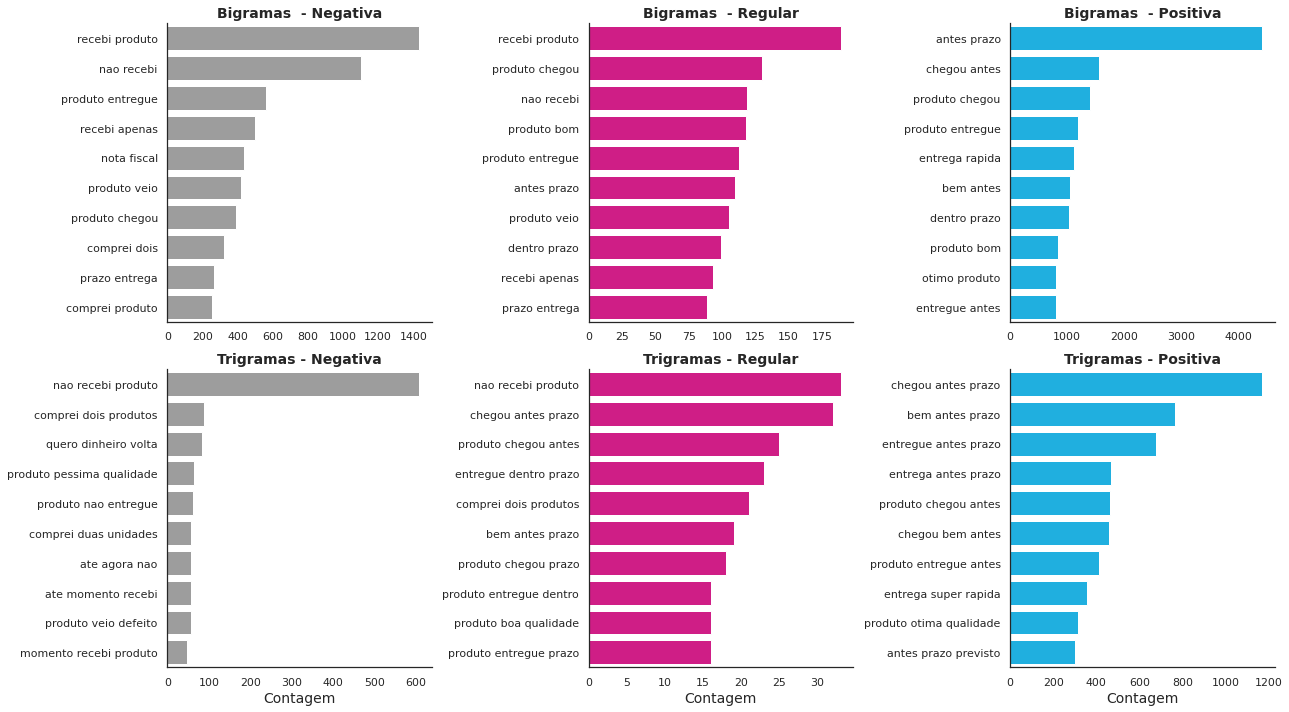

In [31]:
#PLOTAR
# Tranforma em dicinário
ngram_dict_plot = {
   
    'Bigramas  - Negativa': bigrams_neg,
    'Bigramas  - Regular': bigrams_reg,
    'Bigramas  - Positiva': bigrams_pos,
    'Trigramas - Negativa': trigrams_neg,
    'Trigramas - Regular': trigrams_reg,
    'Trigramas - Positiva': trigrams_pos,}

# Grade de plot
linhas=2
colunas=3
fig, axs = plt.subplots(nrows=linhas, ncols=colunas, figsize=(18, 10))

#Cores 
estilos = ['Blues_d', 'Reds_d','Greens_d']
cores=["#9d9d9d","#ec008b","#00BFFF"]
#Indices
i, j = 0, 0
#Iteração
for title, ngram_data in ngram_dict_plot.items():
    ax = axs[i, j]
    sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax,color=cores[j])
    
    #Formatar subgráfico
    sns.despine(bottom = False, left = False)
    ax.set_title(title, size=14,weight='bold')
    ax.set_ylabel('')
    ax.set_xlabel('')
    if i==1:
        ax.set_xlabel('Contagem',size=14,rotation=0)
    
    # Incrementar indice
    j += 1
    if j == colunas:
        j = 0
        i += 1   
        
#Comprimir exebição        
plt.tight_layout()
plt.show()